In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import pyplot as plt


# 1 线性回归模型

In [2]:
mlm = pd.read_csv(r'./Microsoft-ai-edu/Dataset/mlm.csv')
mlm

,x,y,z
0,64.32,6.21,236.522049
1,9.76,86.65,-283.187014
2,18.33,32.97,-48.807113
3,44.73,93.60,-167.729663
4,40.39,27.69,60.373880
...,...,...,...
995,95.00,84.11,69.324702
996,71.51,65.68,45.826668
997,99.07,67.47,148.227387
998,82.07,4.74,317.742907


Text(0.5, 0, 'z label')

<Figure size 432x288 with 0 Axes>

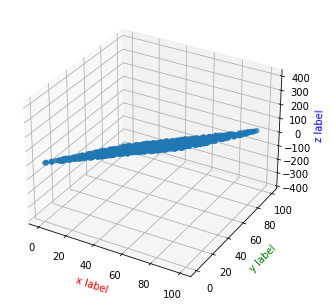

In [13]:
plt.clf()
fig = plt.figure()
ax = Axes3D(fig)
# 将二维转化为三维
# axes3d = Axes3D(fig)
 
# axes3d.scatter3D(x,y,z)
# 效果相同
ax.scatter3D(mlm["x"],mlm["y"],mlm["z"])
ax.set_xlabel('x label', color='r')
ax.set_ylabel('y label', color='g')
ax.set_zlabel('z label', color='b') 

使用正规方程

In [38]:
X = mlm[["x","y"]].to_numpy()
Y = mlm[["z"]].to_numpy()
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)

In [84]:
coe = np.linalg.pinv(X.T@X)@X.T@Y
print(coe)

[[ 4.31052831]
 [ 4.02128315]
 [-3.77089441]]


In [69]:
x_1 = (int(X.T[1].min()),int(X.T[1].max()))
x_2 = (int(X.T[2].min()),int(X.T[2].max()))

In [71]:
print(x_1)
print(x_2)

(0, 100)
(0, 99)


In [74]:
d = np.linspace(0,100,num=200)

In [85]:
d = np.linspace(0,100,num=201)
X_predict = np.column_stack((np.ones(d.shape[0]),d,d))
Y_predict = X_predict@coe

In [108]:
predict = pd.DataFrame(np.column_stack((X_predict.T[1],X_predict.T[2],Y_predict)),columns=["X","Y","Z"])

Text(0.5, 0, 'z label')

<Figure size 432x288 with 0 Axes>

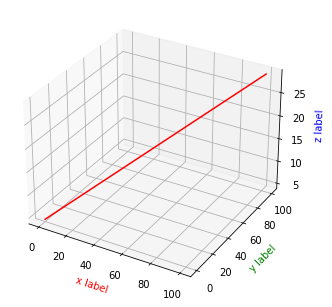

In [111]:
plt.clf()
fig = plt.figure()
ax = Axes3D(fig)
# 将二维转化为三维
# axes3d = Axes3D(fig)
 
# axes3d.scatter3D(x,y,z)
# 效果相同
# ax.scatter3D(mlm["x"],mlm["y"],mlm["z"])
ax.plot(predict["X"],predict["Y"],predict["Z"], color='red')
ax.set_xlabel('x label', color='r')
ax.set_ylabel('y label', color='g')
ax.set_zlabel('z label', color='b') 

# 2 非线性多分类器

In [15]:
data = pd.read_csv("./Microsoft-ai-edu/Dataset/iris.csv")

In [3]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
def one_hot(data):
    cate = list(data.unique())
    data_ = data.copy()
    for index,val in enumerate(cate):
         data_[data_ == val] = index+1
    data_ = data_.to_numpy()
    cate_num = len(cate)
    return (np.arange(1,cate_num+1)==data_[:,None]).astype(np.integer), cate
def reverse_one_hot(data,y_dict):
    data = []
    for i in np.argmax(y,axis=1):
        data.append(y_dict[i])
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(X):
    exps = np.exp(X - np.max(X,axis=1).reshape(-1,1))
    return exps / np.sum(exps,axis=1)[:,None]
y,y_dict = one_hot(data["class"])
X =data[["sepal length","sepal width","petal length","petal width"]].to_numpy()
print(y_dict)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [29]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
# 30%用于测试集，70%用于训练集
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)
nrows, ncols = X.shape
hidden_layer = 4
cate = y_dict
cate_num = len(cate)
theta1 = np.random.normal(0,0.01,size=(hidden_layer,ncols+1))
theta2 = np.random.normal(0,0.01,size=(cate_num,hidden_layer+1))

In [25]:
def learn(batch,batch_y):
    batch_size = len(batch)
    nrows, ncols = batch.shape
    batch_ = np.column_stack([np.ones(nrows), batch])
    Z1 = batch_@theta1.T
    A1 = sigmoid(Z1)
    A1_ = np.column_stack([np.ones(nrows), A1])
    Z2 = A1_@theta2.T
    A2 = softmax(Z2)
    
    dw2 = (A1.T@(A2-batch_y)).T/batch_size
    db2 = sum(A2-batch_y)/batch_size
    dw1 = ((A2-batch_y)@theta2[:,1:]*A1*(1-A1)).T@batch/batch_size
    db1 = sum((A2-batch_y)@theta2[:,1:]*A1*(1-A1))/batch_size
    
    theta2[:,1:]-= learning_rate*dw2
    theta2[:,1]-= learning_rate*db2
    theta1[:,1:]-= learning_rate*dw1
    theta1[:,1]-= learning_rate*db1
    return sum(sum(-(np.log(A2)*batch_y)))/batch_size
def predict(x):
    x_size = len(x)
    nrows, ncols = x.shape
    x_ = np.column_stack([np.ones(nrows), x])
    Z1 = x_@theta1.T
    A1 = sigmoid(Z1)
    A1_ = np.column_stack([np.ones(nrows), A1])
    Z2 = A1_@theta2.T
    A2 = softmax(Z2)
    return A2

In [30]:
# for i in range(10):
count=0
learning_rate = 0.05
loss = []
precesion = []
for i in range(2000):
    low = len(X_train)
    batch_id = np.random.randint(low, size=20)
    m = learn(X_train[batch_id],y_train[batch_id])
    count+=1
    if (count%3==0):
        tmp = ((np.argmax(predict(X_test),axis=1)+1) == np.argmax(y_test,axis=1)+1)
        a,b = m,tmp.sum()/len(tmp)
    #         print("Loss:{},precision:{}".format(round(a,6),round(b,4)))
        loss.append(a)
        precesion.append(b)
        if(count%30==0):
            print("Loss:{},Precision:{}".format(a,b))

Loss:1.0959461902136238,Precision:0.24444444444444444
Loss:1.135366247994407,Precision:0.24444444444444444
Loss:1.0900064298834704,Precision:0.24444444444444444
Loss:1.110754237569639,Precision:0.24444444444444444
Loss:1.0903518865491113,Precision:0.24444444444444444
Loss:1.1140009681185004,Precision:0.24444444444444444
Loss:1.096697020034926,Precision:0.24444444444444444
Loss:1.0771219395783207,Precision:0.24444444444444444
Loss:1.0239340371384014,Precision:0.24444444444444444
Loss:1.019357592985365,Precision:0.5111111111111111
Loss:0.9754241215709637,Precision:0.6
Loss:0.8643385498754792,Precision:0.6
Loss:0.8418995501248464,Precision:0.6
Loss:0.7424100711617542,Precision:0.6
Loss:0.6761704421685021,Precision:0.6
Loss:0.7051038637315185,Precision:0.6
Loss:0.7454447567736479,Precision:0.6
Loss:0.5497869129695481,Precision:0.6
Loss:0.6052074813687288,Precision:0.6
Loss:0.6180904938669973,Precision:0.6222222222222222
Loss:0.5715912605854561,Precision:0.6444444444444445
Loss:0.4775101635

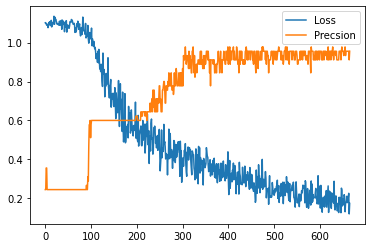

In [31]:
plt.plot(list(range(len(loss))),loss)
plt.plot(list(range(len(loss))),precesion)
plt.legend(["Loss","Precsion"])